C:\Users\User\Documents\py\NAI-05\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


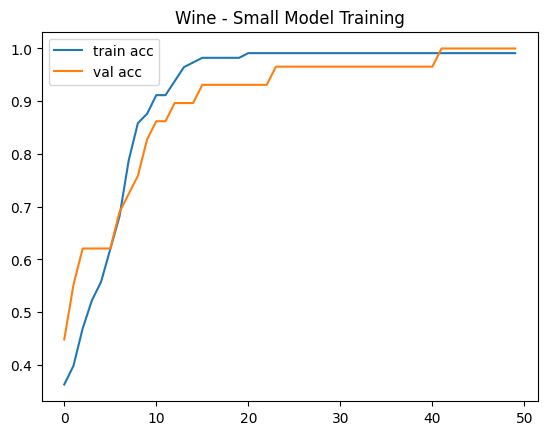

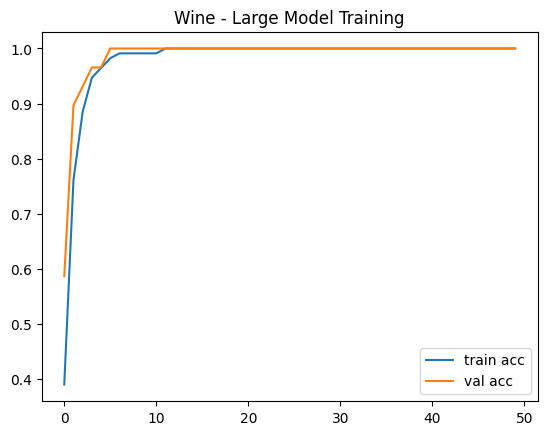

In [1]:
"""
Wine Classification

Autorzy:
- Kacper Sewruk s23466
- Michał Jastrzemski s26245

Ten notebook korzysta z zbioru Wine (z sklearn), klasyfikując rodzaje wina (3 klasy)
na podstawie cech chemicznych. Porównuje dwa modele o różnej wielkości:
1. Mały model (jedna ukryta warstwa)
2. Większy, głębszy model

Wyniki są zapisywane w katalogu `logs/`.
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

os.makedirs('logs', exist_ok=True)

def load_wine_data():
    """
    Wczytuje zbiór Wine z sklearn.

    Zwraca
    -------
    X : ndarray
        Cecha wina (ciągłe atrybuty chemiczne).
    y : ndarray
        Etykiety klas wina (0,1,2).
    """
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

def preprocess_data(X, y):
    """
    Przetwarza dane wina:
    - One-hot encoding etykiet
    - Podział na train/test
    - Normalizacja cech

    Parametry
    ---------
    X : ndarray
        Macierz cech.
    y : ndarray
        Wektor etykiet (0,1,2).

    Zwraca
    -------
    X_train, X_test, y_train, y_test : ndarray
        Dane gotowe do trenowania i testowania modeli.
    """
    y_cat = tf.keras.utils.to_categorical(y, num_classes=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def build_small_model(input_shape):
    """
    Buduje mały model:
    - 1 warstwa ukryta Dense(16, relu)
    - 1 warstwa wyjściowa Dense(3, softmax)

    Parametry
    ---------
    input_shape : tuple
        Kształt danych wejściowych.

    Zwraca
    -------
    model : tf.keras.Model
        Skompilowany model "small".
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_large_model(input_shape):
    """
    Buduje duży model:
    - Dense(64, relu)
    - Dense(32, relu)
    - Dense(16, relu)
    - Dense(3, softmax)

    Parametry
    ---------
    input_shape : tuple
        Kształt danych wejściowych.

    Zwraca
    -------
    model : tf.keras.Model
        Skompilowany "duży" model.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_compare_models(X_train, X_test, y_train, y_test):
    """
    Trenuje i porównuje dwa modele: small i large.
    Zapisuje wyniki do:
    - logs/results_wine.txt
    - logs/training_history_wine_small.png
    - logs/training_history_wine_large.png

    Parametry
    ---------
    X_train, X_test, y_train, y_test : ndarray
        Dane treningowe i testowe oraz etykiety one-hot.
    """
    model_small = build_small_model((X_train.shape[1],))
    history_small = model_small.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=0)
    loss_s, acc_s = model_small.evaluate(X_test, y_test, verbose=0)

    plt.plot(history_small.history['accuracy'], label='train acc')
    plt.plot(history_small.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.title('Wine - Small Model Training')
    plt.savefig('logs/training_history_wine_small.png')
    plt.show()

    model_large = build_large_model((X_train.shape[1],))
    history_large = model_large.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=0)
    loss_l, acc_l = model_large.evaluate(X_test, y_test, verbose=0)

    plt.plot(history_large.history['accuracy'], label='train acc')
    plt.plot(history_large.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.title('Wine - Large Model Training')
    plt.savefig('logs/training_history_wine_large.png')
    plt.show()

    with open('logs/results_wine.txt', 'w') as f:
        f.write(f"Small Model Accuracy: {acc_s}\n")
        f.write(f"Large Model Accuracy: {acc_l}\n")

def main():
    """
    Funkcja główna:
    1. Wczytuje zbiór Wine.
    2. Przetwarza dane (one-hot, normalizacja, podział).
    3. Trenuje dwa modele o różnej wielkości i porównuje wyniki.
    """
    X, y = load_wine_data()
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    train_and_compare_models(X_train, X_test, y_train, y_test)

main()
